In [ ]:
#Download pretrained spacy model en_core_web_sm for advanced natural language processing.
!python -m spacy download en_core_web_sm

Import Libraries

In [ ]:
#Import Required Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import nltk
import spacy
from textblob import TextBlob
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import WhitespaceTokenizer
from nltk import pos_tag
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

Import Data

In [3]:
%%time
#Import Dataset
df=pd.read_excel("/content/hotel_reviews.xlsx")
df.head()

CPU times: user 1.9 s, sys: 36.1 ms, total: 1.93 s
Wall time: 2.07 s


,Review,Rating
0,nice hotel expensive parking got good deal sta...,4.0
1,ok nothing special charge diamond member hilto...,2.0
2,nice rooms not 4* experience hotel monaco seat...,3.0
3,"unique, great stay, wonderful time hotel monac...",5.0
4,"great stay great stay, went seahawk game aweso...",5.0


Data Understanding

In [4]:
df.dtypes

Review     object
Rating    float64
dtype: object

In [5]:
df.describe().round(3)

,Rating
count,20491.000
mean,3.952
std,1.233
min,1.000
25%,3.000
50%,4.000
75%,5.000
max,5.000


In [6]:
df.shape

(20491, 2)

In [7]:
df["Rating"].value_counts()

5.0    9054
4.0    6039
3.0    2184
2.0    1793
1.0    1421
Name: Rating, dtype: int64

In [8]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

In [9]:
count=df.isnull().sum().sort_values(ascending=True)
count

Review    0
Rating    0
dtype: int64

In [10]:
percentage=((df.isnull().sum()/len(df)*100))
percentage

Review    0.0
Rating    0.0
dtype: float64

In [11]:
missing_data=pd.concat([count,percentage],axis=1,keys=["Count","Percentage"])
missing_data

,Count,Percentage
Review,0,0.0
Rating,0,0.0


In [ ]:
df['Review'].unique()[1000]

'shame hotel wasnt good restaurant, arrived clift late afternoon struggle luggage 3 bags, reception staff unhelpful uninterested, eventually managed sorted shown room 9th floor, room suite tried make separate living room putting curtain inbetween bedroom living room, bathroom tiny dirty, stayed mum unfortunatley night didnt feel suffering bad foot, decided phone reception ask doctor come hotel told ther wasnt local receptionist closest told phone, eventually decided hospital just safe, came hospital evening doormen talking girls outside let, following night ate hotel restaurant aisa cuba fantastic, think hotel intrest restaurant bar, end day sleeping ignored wouldnt stay,  '

Exploratory Data Analysis

In [12]:
stop_words = stopwords.words('english')

In [ ]:
stop_words

In [15]:
def text_clean(text):
  """
  This Function make the text into lower case, remove punctuations, urls, escape sequences, etc.
  """
  text=text.lower()
  text=re.sub("\[.*?\]","",text)
  re.sub('\S*https?:\S*',"",text)
  text=re.sub("[%s]" % re.escape(string.punctuation),"",text)
  text=re.sub("\w*\d\w*","",text)
  text=re.sub("\n","",text)
  return text
clean=lambda x : text_clean(x)

In [16]:
%%time
df['Cleaned_Review'] = df['Review'].apply(clean)
df.head()

CPU times: user 2.75 s, sys: 6.12 ms, total: 2.76 s
Wall time: 2.75 s


,Review,Rating,Cleaned_Review
0,nice hotel expensive parking got good deal sta...,4.0,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2.0,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3.0,nice rooms not experience hotel monaco seattl...
3,"unique, great stay, wonderful time hotel monac...",5.0,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5.0,great stay great stay went seahawk game awesom...


Word Frequency - Before Removing Stop Words

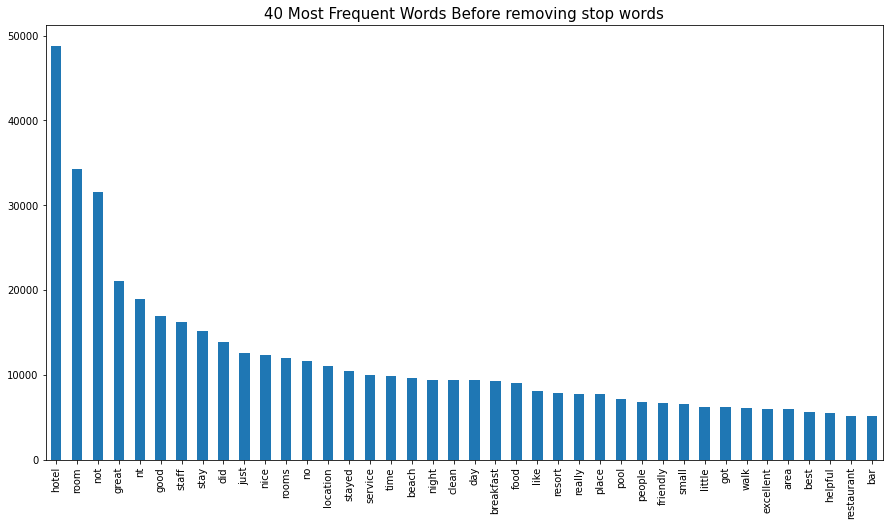

In [17]:
word_freq_1=pd.Series(" ".join(df['Cleaned_Review']).split()).value_counts()[:40]
word_freq_1.plot(kind='bar',figsize=(15,8))
plt.title('40 Most Frequent Words Before removing stop words',size=15)
plt.show()

In [18]:
%%time
df['Cleaned_Review']=df['Cleaned_Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
df.head()

CPU times: user 6.06 s, sys: 11.8 ms, total: 6.08 s
Wall time: 6.71 s


,Review,Rating,Cleaned_Review
0,nice hotel expensive parking got good deal sta...,4.0,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2.0,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3.0,nice rooms experience hotel monaco seattle goo...
3,"unique, great stay, wonderful time hotel monac...",5.0,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5.0,great stay great stay went seahawk game awesom...


Word Frequency After Removing Stop Words

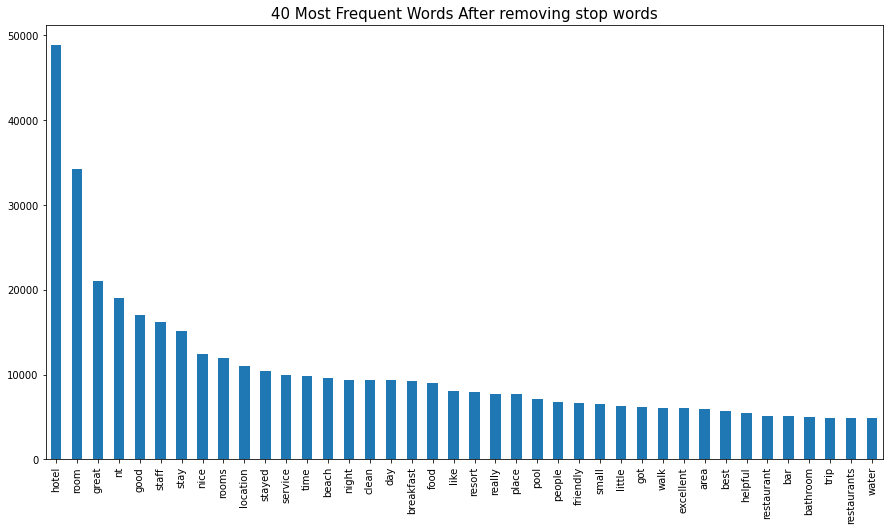

In [19]:
word_freq_2=pd.Series(" ".join(df['Cleaned_Review']).split()).value_counts()[:40]
word_freq_2.plot(kind='bar',figsize=(15,8))
plt.title('40 Most Frequent Words After removing stop words',size=15)
plt.show()

Lemmatization

In [20]:
lemmatizer = WordNetLemmatizer()
w_tokenizer=WhitespaceTokenizer()

In [21]:
def lemmatize(txt):
  """
  This function takes text string as input lemmatize it to its root/base/stem word.
  """
  for word, tag in pos_tag([txt]):
    wntag = tag[0].lower()
    if wntag in ['a', 'r', 'n', 'v']:
      lemma = lemmatizer.lemmatize(word, wntag)
    else:
      lemma = word
  return lemma

In [22]:
%%time
df['Lemmatized_Review']=df['Cleaned_Review'].apply(lambda x: ' '.join([lemmatize(word) for word in w_tokenizer.tokenize(x)]))
df.head()

CPU times: user 3min 59s, sys: 12.2 s, total: 4min 11s
Wall time: 4min 12s


,Review,Rating,Cleaned_Review,Lemmatized_Review
0,nice hotel expensive parking got good deal sta...,4.0,nice hotel expensive parking got good deal sta...,nice hotel expensive parking get good deal sta...
1,ok nothing special charge diamond member hilto...,2.0,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3.0,nice rooms experience hotel monaco seattle goo...,nice room experience hotel monaco seattle good...
3,"unique, great stay, wonderful time hotel monac...",5.0,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5.0,great stay great stay went seahawk game awesom...,great stay great stay go seahawk game awesome ...


Review Before Lemmatization

In [118]:
df['Cleaned_Review'][1000]

'shame hotel wasnt good restaurant arrived clift late afternoon struggle luggage bags reception staff unhelpful uninterested eventually managed sorted shown room floor room suite tried make separate living room putting curtain inbetween bedroom living room bathroom tiny dirty stayed mum unfortunatley night didnt feel suffering bad foot decided phone reception ask doctor come hotel told ther wasnt local receptionist closest told phone eventually decided hospital safe came hospital evening doormen talking girls outside let following night ate hotel restaurant aisa cuba fantastic think hotel intrest restaurant bar end day sleeping ignored wouldnt stay'

In [119]:
len(df['Cleaned_Review'][1000])

655

check for length of words that are lemmatized...

Review After Lemmatization

In [120]:
df['Lemmatized_Review'][1000]

'shame hotel wasnt good restaurant arrive clift late afternoon struggle luggage bag reception staff unhelpful uninterested eventually manage sort show room floor room suite try make separate living room put curtain inbetween bedroom living room bathroom tiny dirty stayed mum unfortunatley night didnt feel suffer bad foot decide phone reception ask doctor come hotel told ther wasnt local receptionist closest told phone eventually decide hospital safe come hospital even doorman talk girl outside let follow night ate hotel restaurant aisa cuba fantastic think hotel intrest restaurant bar end day sleep ignore wouldnt stay'

In [121]:
len(df['Lemmatized_Review'][1000])

624

Sentiment Analysis Using TextBlob

In [26]:
%%time
def sentimental_analysis(df):
  """
  This Function takes review (word/sentence/corpus) as input and find Subjectivity and Polarity
  """
  sentiment=TextBlob(df['Lemmatized_Review']).sentiment
  return pd.Series([sentiment.subjectivity,sentiment.polarity])
df[['subjectivity','polarity']]=df.apply(sentimental_analysis,axis=1)
df.head()

CPU times: user 17.3 s, sys: 116 ms, total: 17.4 s
Wall time: 17.4 s


,Review,Rating,Cleaned_Review,Lemmatized_Review,subjectivity,polarity
0,nice hotel expensive parking got good deal sta...,4.0,nice hotel expensive parking got good deal sta...,nice hotel expensive parking get good deal sta...,0.687000,0.208744
1,ok nothing special charge diamond member hilto...,2.0,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,0.524707,0.233398
2,nice rooms not 4* experience hotel monaco seat...,3.0,nice rooms experience hotel monaco seattle goo...,nice room experience hotel monaco seattle good...,0.595699,0.291014
3,"unique, great stay, wonderful time hotel monac...",5.0,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...,0.712963,0.532870
4,"great stay great stay, went seahawk game aweso...",5.0,great stay great stay went seahawk game awesom...,great stay great stay go seahawk game awesome ...,0.613010,0.462500


Sentiment Analysis using Vader Lexicon

In [27]:
SIA = SentimentIntensityAnalyzer()

In [28]:
%%time
df['Vader_Lexicon'] = df['Lemmatized_Review'].apply(lambda x : SIA.polarity_scores(x))
df.head()

CPU times: user 23.8 s, sys: 98.4 ms, total: 23.9 s
Wall time: 23.9 s


,Review,Rating,Cleaned_Review,Lemmatized_Review,subjectivity,polarity,Vader_Lexicon
0,nice hotel expensive parking got good deal sta...,4.0,nice hotel expensive parking got good deal sta...,nice hotel expensive parking get good deal sta...,0.687000,0.208744,"{'neg': 0.056, 'neu': 0.617, 'pos': 0.327, 'co..."
1,ok nothing special charge diamond member hilto...,2.0,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,0.524707,0.233398,"{'neg': 0.054, 'neu': 0.7, 'pos': 0.246, 'comp..."
2,nice rooms not 4* experience hotel monaco seat...,3.0,nice rooms experience hotel monaco seattle goo...,nice room experience hotel monaco seattle good...,0.595699,0.291014,"{'neg': 0.049, 'neu': 0.701, 'pos': 0.25, 'com..."
3,"unique, great stay, wonderful time hotel monac...",5.0,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...,0.712963,0.532870,"{'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'comp..."
4,"great stay great stay, went seahawk game aweso...",5.0,great stay great stay went seahawk game awesom...,great stay great stay go seahawk game awesome ...,0.613010,0.462500,"{'neg': 0.068, 'neu': 0.63, 'pos': 0.302, 'com..."


In [29]:
%%time
df1=pd.concat([df.drop(['Vader_Lexicon'],axis=1),df['Vader_Lexicon'].apply(pd.Series)],axis=1)
df1.head()

CPU times: user 5.85 s, sys: 257 ms, total: 6.11 s
Wall time: 5.88 s


,Review,Rating,Cleaned_Review,Lemmatized_Review,subjectivity,polarity,neg,neu,pos,compound
0,nice hotel expensive parking got good deal sta...,4.0,nice hotel expensive parking got good deal sta...,nice hotel expensive parking get good deal sta...,0.687000,0.208744,0.056,0.617,0.327,0.9808
1,ok nothing special charge diamond member hilto...,2.0,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,0.524707,0.233398,0.054,0.700,0.246,0.9941
2,nice rooms not 4* experience hotel monaco seat...,3.0,nice rooms experience hotel monaco seattle goo...,nice room experience hotel monaco seattle good...,0.595699,0.291014,0.049,0.701,0.250,0.9931
3,"unique, great stay, wonderful time hotel monac...",5.0,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...,0.712963,0.532870,0.000,0.552,0.448,0.9949
4,"great stay great stay, went seahawk game aweso...",5.0,great stay great stay went seahawk game awesom...,great stay great stay go seahawk game awesome ...,0.613010,0.462500,0.068,0.630,0.302,0.9951


Finding Number of Characters for each Review

In [31]:
df1['no_chars']=df1['Lemmatized_Review'].apply(lambda x : len(x))
df1.head()

,Review,Rating,Cleaned_Review,Lemmatized_Review,subjectivity,polarity,neg,neu,pos,compound,no_chars
0,nice hotel expensive parking got good deal sta...,4.0,nice hotel expensive parking got good deal sta...,nice hotel expensive parking get good deal sta...,0.687000,0.208744,0.056,0.617,0.327,0.9808,528
1,ok nothing special charge diamond member hilto...,2.0,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,0.524707,0.233398,0.054,0.700,0.246,0.9941,1517
2,nice rooms not 4* experience hotel monaco seat...,3.0,nice rooms experience hotel monaco seattle goo...,nice room experience hotel monaco seattle good...,0.595699,0.291014,0.049,0.701,0.250,0.9931,1271
3,"unique, great stay, wonderful time hotel monac...",5.0,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...,0.712963,0.532870,0.000,0.552,0.448,0.9949,547
4,"great stay great stay, went seahawk game aweso...",5.0,great stay great stay went seahawk game awesom...,great stay great stay go seahawk game awesome ...,0.613010,0.462500,0.068,0.630,0.302,0.9951,1113


Finding Number of Words for each Review

In [33]:
df1['no_words']=df1['Lemmatized_Review'].apply(lambda x : len(x.split(" ")))
df1.head()

,Review,Rating,Cleaned_Review,Lemmatized_Review,subjectivity,polarity,neg,neu,pos,compound,no_chars,no_words
0,nice hotel expensive parking got good deal sta...,4.0,nice hotel expensive parking got good deal sta...,nice hotel expensive parking get good deal sta...,0.687000,0.208744,0.056,0.617,0.327,0.9808,528,80
1,ok nothing special charge diamond member hilto...,2.0,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,0.524707,0.233398,0.054,0.700,0.246,0.9941,1517,228
2,nice rooms not 4* experience hotel monaco seat...,3.0,nice rooms experience hotel monaco seattle goo...,nice room experience hotel monaco seattle good...,0.595699,0.291014,0.049,0.701,0.250,0.9931,1271,195
3,"unique, great stay, wonderful time hotel monac...",5.0,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...,0.712963,0.532870,0.000,0.552,0.448,0.9949,547,85
4,"great stay great stay, went seahawk game aweso...",5.0,great stay great stay went seahawk game awesom...,great stay great stay go seahawk game awesome ...,0.613010,0.462500,0.068,0.630,0.302,0.9951,1113,178


In [34]:
df1.rename(columns={'neg':'neg_senti_score','neu':'neu_senti_score','pos':'pos_senti_score'},inplace=True)
df1.head()

,Review,Rating,Cleaned_Review,Lemmatized_Review,subjectivity,polarity,neg_senti_score,neu_senti_score,pos_senti_score,compound,no_chars,no_words
0,nice hotel expensive parking got good deal sta...,4.0,nice hotel expensive parking got good deal sta...,nice hotel expensive parking get good deal sta...,0.687000,0.208744,0.056,0.617,0.327,0.9808,528,80
1,ok nothing special charge diamond member hilto...,2.0,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,0.524707,0.233398,0.054,0.700,0.246,0.9941,1517,228
2,nice rooms not 4* experience hotel monaco seat...,3.0,nice rooms experience hotel monaco seattle goo...,nice room experience hotel monaco seattle good...,0.595699,0.291014,0.049,0.701,0.250,0.9931,1271,195
3,"unique, great stay, wonderful time hotel monac...",5.0,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...,0.712963,0.532870,0.000,0.552,0.448,0.9949,547,85
4,"great stay great stay, went seahawk game aweso...",5.0,great stay great stay went seahawk game awesom...,great stay great stay go seahawk game awesome ...,0.613010,0.462500,0.068,0.630,0.302,0.9951,1113,178


In [35]:
%%time
def sentiment_score(df1):
  """
  This function takes input as compound value found from Vader Lexicon and try to classify whether the review is Positive/Negative/Neutral
  """
  if df1['compound']>= 0.05:
    return 'Positive'
  elif (df1['compound'] > -0.05) & (df1['compound']< 0.05):
    return 'Neutral'
  else:
    return 'Negative'
df1['Sentiment_Vader_Compound']=df1.apply(sentiment_score,axis=1)
df1.head()

CPU times: user 181 ms, sys: 977 µs, total: 182 ms
Wall time: 182 ms


,Review,Rating,Cleaned_Review,Lemmatized_Review,subjectivity,polarity,neg_senti_score,neu_senti_score,pos_senti_score,compound,no_chars,no_words,Sentiment_Vader_Compound
0,nice hotel expensive parking got good deal sta...,4.0,nice hotel expensive parking got good deal sta...,nice hotel expensive parking get good deal sta...,0.687000,0.208744,0.056,0.617,0.327,0.9808,528,80,Positive
1,ok nothing special charge diamond member hilto...,2.0,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,0.524707,0.233398,0.054,0.700,0.246,0.9941,1517,228,Positive
2,nice rooms not 4* experience hotel monaco seat...,3.0,nice rooms experience hotel monaco seattle goo...,nice room experience hotel monaco seattle good...,0.595699,0.291014,0.049,0.701,0.250,0.9931,1271,195,Positive
3,"unique, great stay, wonderful time hotel monac...",5.0,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...,0.712963,0.532870,0.000,0.552,0.448,0.9949,547,85,Positive
4,"great stay great stay, went seahawk game aweso...",5.0,great stay great stay went seahawk game awesom...,great stay great stay go seahawk game awesome ...,0.613010,0.462500,0.068,0.630,0.302,0.9951,1113,178,Positive


In [36]:
%%time
def polarity_analysis(score):
  """
  This function takes polarity score found from TextBlob sentiment and try to classify whether the review is Positive/Negative/Neutral
  """
  if score>0:
    return('Positive')
  elif score==0:
    return('Neutral')
  else:
    return('Negative')
df1['sentiment_polarity']=df1['polarity'].apply(polarity_analysis)
df1.head()

CPU times: user 7 ms, sys: 872 µs, total: 7.87 ms
Wall time: 8.12 ms


,Review,Rating,Cleaned_Review,Lemmatized_Review,subjectivity,polarity,neg_senti_score,neu_senti_score,pos_senti_score,compound,no_chars,no_words,Sentiment_Vader_Compound,sentiment_polarity
0,nice hotel expensive parking got good deal sta...,4.0,nice hotel expensive parking got good deal sta...,nice hotel expensive parking get good deal sta...,0.687000,0.208744,0.056,0.617,0.327,0.9808,528,80,Positive,Positive
1,ok nothing special charge diamond member hilto...,2.0,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,0.524707,0.233398,0.054,0.700,0.246,0.9941,1517,228,Positive,Positive
2,nice rooms not 4* experience hotel monaco seat...,3.0,nice rooms experience hotel monaco seattle goo...,nice room experience hotel monaco seattle good...,0.595699,0.291014,0.049,0.701,0.250,0.9931,1271,195,Positive,Positive
3,"unique, great stay, wonderful time hotel monac...",5.0,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...,0.712963,0.532870,0.000,0.552,0.448,0.9949,547,85,Positive,Positive
4,"great stay great stay, went seahawk game aweso...",5.0,great stay great stay went seahawk game awesom...,great stay great stay go seahawk game awesome ...,0.613010,0.462500,0.068,0.630,0.302,0.9951,1113,178,Positive,Positive


Sentiment Analysis using Spacy Pretrained Model with Positive/Negative words dataset

In [37]:
#Import list of positive words. Set the values as 1
positive_words = pd.read_csv('/content/positive-words.txt',header=None,encoding='latin-1')
positive_words['value']=1
positive_words.head()

,0,value
0,a+,1
1,abound,1
2,abounds,1
3,abundance,1
4,abundant,1


In [38]:
#Import list of negative words. Set the values as -1
negative_words = pd.read_csv('/content/negative-words.txt',header=None,encoding='latin-1')
negative_words['value']=-1
negative_words.head()

,0,value
0,2-faced,-1
1,2-faces,-1
2,abnormal,-1
3,abolish,-1
4,abominable,-1


In [ ]:
#Combining both positive and negative words and making it a dictionary.
positive_negative = pd.concat([positive_words,negative_words])
positive_negative_words=positive_negative.set_index(0)['value'].to_dict()
positive_negative_words

In [40]:
nlp=spacy.load('en_core_web_sm')

In [41]:
def calculate_sentiment(text: str=None):
  """
  This function gets the input string, Use pretrained model "en_core_web_sm" to preprocess the input string,
  Assign each word a sentiment value (+1 for positive words, -1 for negative words) sum it up for each sentence.
  and return the sum value.
  """
  senti_score = 0
  if text:
    sentence = nlp(text)
    for word in sentence:
      senti_score = senti_score + positive_negative_words.get(word.lemma_,0)
  return senti_score

In [42]:
calculate_sentiment('happy')

1

In [43]:
calculate_sentiment('sad')

-1

In [44]:
%%time
df1['sentiment_spacy_pos_neg']=df1['Lemmatized_Review'].apply(calculate_sentiment)
df1.head()

CPU times: user 5min 2s, sys: 1.25 s, total: 5min 3s
Wall time: 5min 2s


,Review,Rating,Cleaned_Review,Lemmatized_Review,subjectivity,polarity,neg_senti_score,neu_senti_score,pos_senti_score,compound,no_chars,no_words,Sentiment_Vader_Compound,sentiment_polarity,sentiment_spacy_pos_neg
0,nice hotel expensive parking got good deal sta...,4.0,nice hotel expensive parking got good deal sta...,nice hotel expensive parking get good deal sta...,0.687000,0.208744,0.056,0.617,0.327,0.9808,528,80,Positive,Positive,6
1,ok nothing special charge diamond member hilto...,2.0,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,0.524707,0.233398,0.054,0.700,0.246,0.9941,1517,228,Positive,Positive,16
2,nice rooms not 4* experience hotel monaco seat...,3.0,nice rooms experience hotel monaco seattle goo...,nice room experience hotel monaco seattle good...,0.595699,0.291014,0.049,0.701,0.250,0.9931,1271,195,Positive,Positive,10
3,"unique, great stay, wonderful time hotel monac...",5.0,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...,0.712963,0.532870,0.000,0.552,0.448,0.9949,547,85,Positive,Positive,16
4,"great stay great stay, went seahawk game aweso...",5.0,great stay great stay went seahawk game awesom...,great stay great stay go seahawk game awesome ...,0.613010,0.462500,0.068,0.630,0.302,0.9951,1113,178,Positive,Positive,9


In [51]:
%%time
def spacy_analysis(score):
  """
  This function takes sentiment_spacy_pos_neg score found from Spacy sentiment and try to classify whether the review is Positive/Negative/Neutral
  """
  if score>0:
    return('Positive')
  elif score==0:
    return('Neutral')
  else:
    return('Negative')
df1['sentiment_spacy']=df1['sentiment_spacy_pos_neg'].apply(spacy_analysis)
df1.head()

CPU times: user 6.39 ms, sys: 0 ns, total: 6.39 ms
Wall time: 9.39 ms


,Review,Rating,Cleaned_Review,Lemmatized_Review,subjectivity,polarity,neg_senti_score,neu_senti_score,pos_senti_score,compound,no_chars,no_words,Sentiment_Vader_Compound,sentiment_polarity,sentiment_spacy_pos_neg,sentiment_spacy
0,nice hotel expensive parking got good deal sta...,4.0,nice hotel expensive parking got good deal sta...,nice hotel expensive parking get good deal sta...,0.687000,0.208744,0.056,0.617,0.327,0.9808,528,80,Positive,Positive,6,Positive
1,ok nothing special charge diamond member hilto...,2.0,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,0.524707,0.233398,0.054,0.700,0.246,0.9941,1517,228,Positive,Positive,16,Positive
2,nice rooms not 4* experience hotel monaco seat...,3.0,nice rooms experience hotel monaco seattle goo...,nice room experience hotel monaco seattle good...,0.595699,0.291014,0.049,0.701,0.250,0.9931,1271,195,Positive,Positive,10,Positive
3,"unique, great stay, wonderful time hotel monac...",5.0,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...,0.712963,0.532870,0.000,0.552,0.448,0.9949,547,85,Positive,Positive,16,Positive
4,"great stay great stay, went seahawk game aweso...",5.0,great stay great stay went seahawk game awesom...,great stay great stay go seahawk game awesome ...,0.613010,0.462500,0.068,0.630,0.302,0.9951,1113,178,Positive,Positive,9,Positive


Rating Vs Sentiment using Vader Lexicon

In [54]:
rating_vs_Sentiment_Vader_Compound = pd.crosstab(index=df1['Rating'],columns=df1['Sentiment_Vader_Compound'],
                                                 values=df1['Sentiment_Vader_Compound'],aggfunc='count')
rating_vs_Sentiment_Vader_Compound

Sentiment_Vader_Compound,Negative,Neutral,Positive
Rating,,,
1.0,629,37,755
2.0,275,19,1499
3.0,60,9,2115
4.0,23,7,6009
5.0,21,5,9028


Rating Vs Sentiment using TextBlob Polarity

In [55]:
rating_vs_sentiment_polarity = pd.crosstab(index=df1['Rating'],columns=df1['sentiment_polarity'],
                                           values=df1['sentiment_polarity'],aggfunc='count')
rating_vs_sentiment_polarity

sentiment_polarity,Negative,Neutral,Positive
Rating,,,
1.0,672,6,743
2.0,294,4,1495
3.0,96,6,2082
4.0,34,1,6004
5.0,30,7,9017


Rating Vs Sentiment using Spacy

In [56]:
rating_vs_sentiment_spacy = pd.crosstab(index=df1['Rating'],columns=df1['sentiment_spacy'],
                                           values=df1['sentiment_spacy'],aggfunc='count')
rating_vs_sentiment_spacy

sentiment_spacy,Negative,Neutral,Positive
Rating,,,
1.0,871,123,427
2.0,552,156,1085
3.0,173,88,1923
4.0,100,54,5885
5.0,53,53,8948


In [122]:
df1['Rating'].value_counts()

5.0    9054
4.0    6039
3.0    2184
2.0    1793
1.0    1421
Name: Rating, dtype: int64

Most Positive  Review

In [88]:
df1_positive=df1[df1['no_words']>100].sort_values("sentiment_spacy_pos_neg",ascending=False)[["Lemmatized_Review","Rating","sentiment_spacy_pos_neg"]]
df1_positive.head(1)

,Lemmatized_Review,Rating,sentiment_spacy_pos_neg
18917,ocean blue excellent resort boyfriend stayed o...,5.0,101


In [62]:
df1['Review'][18917]

'ocean blue excellent resort, boyfriend mid-20__Ç_é_ stayed ocean blue 6 days week june, awesome time relaxation beach ocean fruity frosty drinks, booked trip left read ocean blue reviews faithfully, little concerned negative reviews figured we__Ç_éö, think value ocean blue excellent booked hotel apple flight separately usa3000 ocean blue 57 day, reading reviews main complaints time food friendliness staff, travelers generally pretty happy hotel/grounds pools/beach rooms drinks, thing like note future ocean blue-goers all-inclusive travelers general all-inclusive resorts generally masses, tropical locale pretty inexpensive generally newer clean food drinks you__Ç_éö basic tgi friday__Ç_é_/outback/olive garden/etc, decent food price somewhat mass-produced, you__Ç_éÈe paying night hotel beach food alcohol activities you__Ç_éö paying nice meal high-end restaurant, saying goes pay not expect morton__Ç_é_ steakhouse meals not paying, advice i__Ç_é_x0096_ sure you__Ç_éêl enjoy review__Ç br/ 

In [63]:
df1.loc[18917]

Review                      ocean blue excellent resort, boyfriend mid-20_...
Rating                                                                    5.0
Cleaned_Review              ocean blue excellent resort boyfriend stayed o...
Lemmatized_Review           ocean blue excellent resort boyfriend stayed o...
subjectivity                                                         0.514002
polarity                                                             0.267667
neg_senti_score                                                         0.041
neu_senti_score                                                         0.607
pos_senti_score                                                         0.353
compound                                                               0.9999
no_chars                                                                 6037
no_words                                                                  920
Sentiment_Vader_Compound                                        

Most Negative Review

In [89]:
df1_negative=df1[df1['no_words']>100].sort_values("sentiment_spacy_pos_neg",ascending=True)[["Lemmatized_Review","Rating","sentiment_spacy_pos_neg"]]
df1_negative.head(1)

,Lemmatized_Review,Rating,sentiment_spacy_pos_neg
6629,worst hotel stayed book holiday wary cheaper h...,1.0,-28


In [64]:
df1['Review'][6629]

'worst hotel stayed booked holiday wary cheaper hotels resort just thought good deal, wrong were.room start place huge no directed room just arrived spent 30 minutes looking rooms, did tried stay positive basic dingy, soon getting annoyed, no hot water rooms problem know people door huge gap floor air conditioning vent big cracks floor tiles cracked tv didnt work not vitally important no light shower, restuarants main buffet restaurant awful, told alot restauruants dominican not air conditioned not happy fact restaurant not seperated eating area boiling appetites soon gone saw flys food supposed eat, getting food not fussy fact read peoples reviews saying poor restaurant just thought expecting, food really terrible, pregnanct time worried eating husband eat pasta sauce, cant comment overly restaurants actually ended paying extra hotels come, 3 nights catalonia, did try steakhouse ants crawling table soon appetites rest.staff know hotels staff unfriendly god staff awful, just giving dir

In [65]:
df1.loc[6629]

Review                      worst hotel stayed booked holiday wary cheaper...
Rating                                                                    1.0
Cleaned_Review              worst hotel stayed booked holiday wary cheaper...
Lemmatized_Review           worst hotel stayed book holiday wary cheaper h...
subjectivity                                                         0.631993
polarity                                                            -0.040346
neg_senti_score                                                         0.207
neu_senti_score                                                         0.625
pos_senti_score                                                         0.167
compound                                                              -0.9401
no_chars                                                                 2323
no_words                                                                  357
Sentiment_Vader_Compound                                        

N - Gram

In [66]:
def get_top_n_words(df,n=None,ngram=None):
  """
  This function takes review as input and provide most frequent Bi-Gram or Tri-Gram Words.
  """
  vect_bigrams=CountVectorizer(max_features=2000,ngram_range=ngram).fit(df)
  bag_of_words=vect_bigrams.transform(df)
  sum_of_words=bag_of_words.sum(axis=0)
  word_frequency=[(word,sum_of_words[0,idx]) for word,idx in vect_bigrams.vocabulary_.items()]
  word_frequency=sorted(word_frequency,key=lambda x : x[1],reverse=True)
  return word_frequency[:n]

Bi-Gram

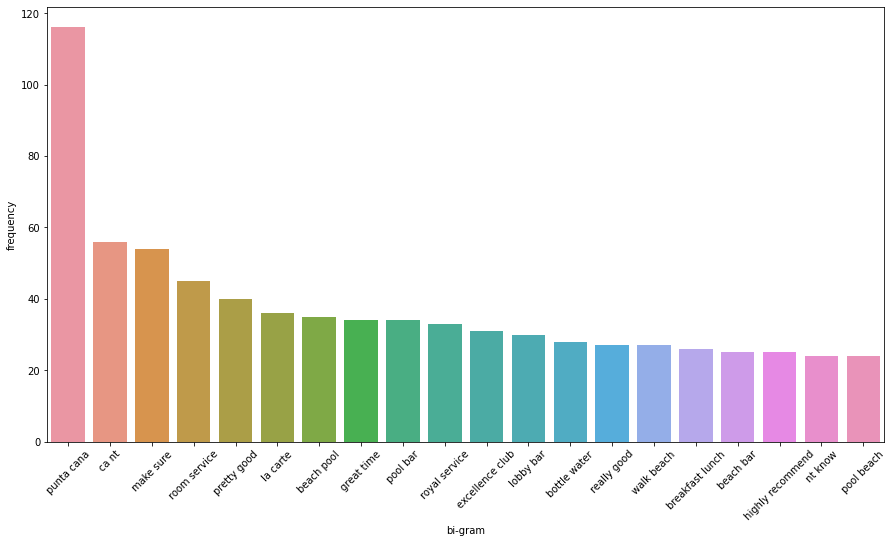

In [100]:
df1_pos = df1_positive[:100]
top_20_pos_bigram=get_top_n_words(df1_pos['Lemmatized_Review'],n=20,ngram=(2,2))
top_20_pos_bigram=pd.DataFrame(top_20_pos_bigram,columns=['bi-gram','frequency'])
plt.figure(figsize=(15,8))
fig=sns.barplot(x='bi-gram',y='frequency',data=top_20_pos_bigram)
fig.set_xticklabels(rotation=45,labels=top_20_pos_bigram['bi-gram'])
plt.show()


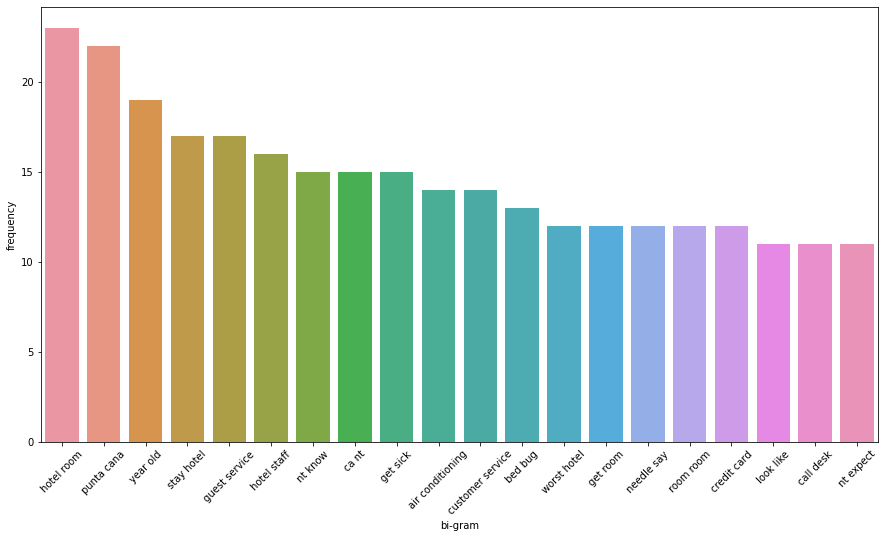

In [101]:
df1_neg = df1_negative[:100]
top_20_neg_bigram=get_top_n_words(df1_neg['Lemmatized_Review'],n=20,ngram=(2,2))
top_20_neg_bigram=pd.DataFrame(top_20_neg_bigram,columns=['bi-gram','frequency'])
plt.figure(figsize=(15,8))
fig=sns.barplot(x='bi-gram',y='frequency',data=top_20_neg_bigram)
fig.set_xticklabels(rotation=45,labels=top_20_neg_bigram['bi-gram'])
plt.show()

Tri Gram

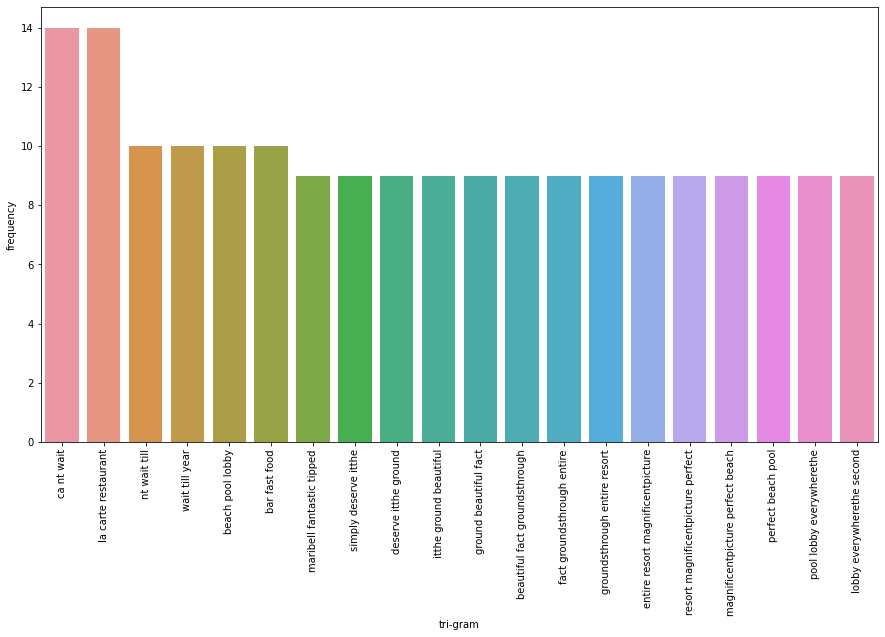

In [103]:
top_20_pos_trigram=get_top_n_words(df1_pos['Lemmatized_Review'],n=20,ngram=(3,3))
top_20_pos_trigram=pd.DataFrame(top_20_pos_trigram,columns=['tri-gram','frequency'])
plt.figure(figsize=(15,8))
fig=sns.barplot(x='tri-gram',y='frequency',data=top_20_pos_trigram)
fig.set_xticklabels(rotation=90,labels=top_20_pos_trigram['tri-gram'])
plt.show()

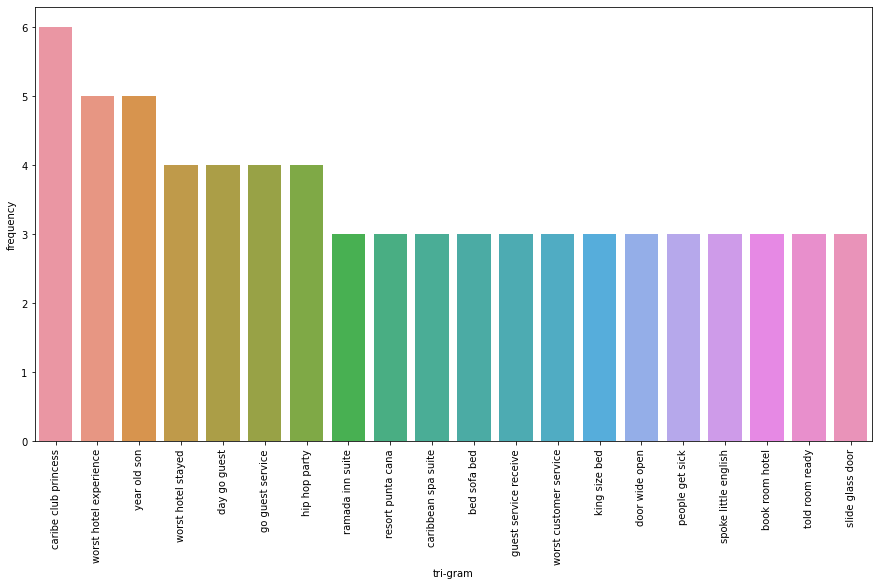

In [104]:
top_20_neg_trigram=get_top_n_words(df1_neg['Lemmatized_Review'],n=20,ngram=(3,3))
top_20_neg_trigram=pd.DataFrame(top_20_neg_trigram,columns=['tri-gram','frequency'])
plt.figure(figsize=(15,8))
fig=sns.barplot(x='tri-gram',y='frequency',data=top_20_neg_trigram)
fig.set_xticklabels(rotation=90,labels=top_20_neg_trigram['tri-gram'])
plt.show()

Word Cloud

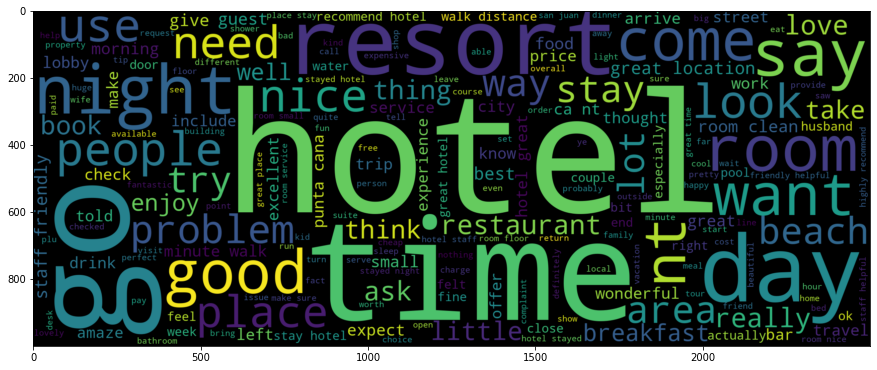

In [111]:
#From complete Reviews
string = " ".join(df1['Lemmatized_Review'])
word_cloud = WordCloud(width=2500,height=1000).generate(string)
plt.figure(figsize=(15,15))
plt.imshow(word_cloud,interpolation='bilinear')
plt.show()

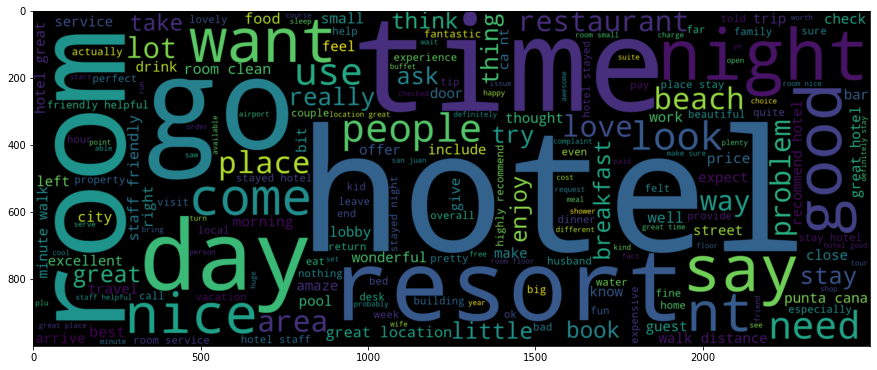

In [112]:
#From Positive Reviews
string = " ".join(df1[df1['sentiment_spacy']=='Positive']['Lemmatized_Review'])
word_cloud = WordCloud(width=2500,height=1000).generate(string)
plt.figure(figsize=(15,15))
plt.imshow(word_cloud,interpolation='bilinear')
plt.show()

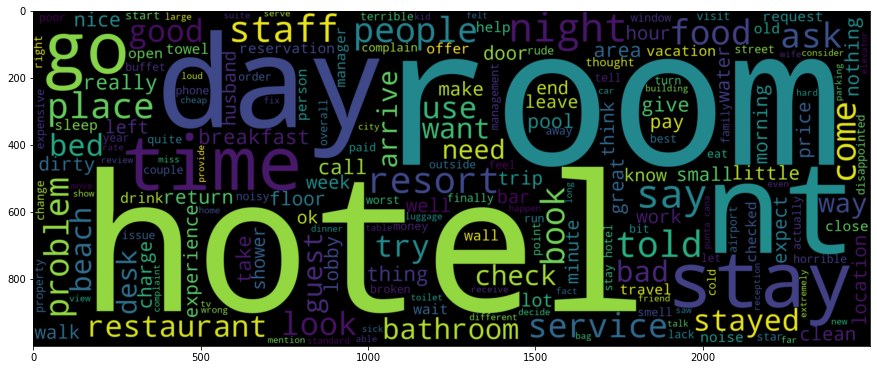

In [113]:
#From Negative Reviews
string = " ".join(df1[df1['sentiment_spacy']=='Negative']['Lemmatized_Review'])
word_cloud = WordCloud(width=2500,height=1000).generate(string)
plt.figure(figsize=(15,15))
plt.imshow(word_cloud,interpolation='bilinear')
plt.show()

In [114]:
df1.describe()

,Rating,subjectivity,polarity,neg_senti_score,neu_senti_score,pos_senti_score,compound,no_chars,no_words,sentiment_spacy_pos_neg
count,20491.000000,20491.000000,20491.000000,20491.000000,20491.000000,20491.000000,20491.000000,20491.000000,20491.000000,20491.000000
mean,3.952223,0.583555,0.277861,0.059205,0.604736,0.336063,0.859554,650.025621,97.627641,8.358255
std,1.233030,0.101842,0.175568,0.060222,0.103011,0.122155,0.370479,610.165552,93.320158,7.890660
min,1.000000,0.000000,-1.000000,0.000000,0.132000,0.000000,-0.993100,32.000000,6.000000,-28.000000
25%,3.000000,0.519512,0.182917,0.015000,0.541000,0.254000,0.941300,307.000000,46.000000,4.000000
50%,4.000000,0.578654,0.282639,0.046000,0.611000,0.330000,0.978400,484.000000,72.000000,8.000000
75%,5.000000,0.644233,0.383102,0.085000,0.674000,0.413000,0.990600,772.500000,116.000000,12.000000
max,5.000000,1.000000,1.000000,0.673000,1.000000,0.818000,0.999900,12094.000000,1847.000000,101.000000
